![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [99]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
import scipy.stats as stats

In [100]:
men=pd.read_csv("men_results.csv")
women=pd.read_csv("women_results.csv")

In [101]:
#EDA
print(men.head())
print(men.describe())
print(men.isna().sum())
print(men.dtypes)
print(men["tournament"].value_counts().sum())
print(women.head())
print(women.isna().sum())
print(women.dtypes)
print(women["tournament"].value_counts().sum())

   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]
         Unnamed: 0    home_score    away_score
count  44353.000000  44353.000000  44353.000000
mean   22176.000000      1.740559      1.178793
std    12803.752581      1.748722      1.394580
min        0.000000      0.000000      0.000000
25%    11088.000000      1.000000      0.000000
50%    22176.000000      1.000000      1.000000
75%    33264.000000      2.000000      2.000000
max    44352.000000     31.000000     21.000000
Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score

In [102]:
#adding total score
men["total_score"]=men["home_score"]+men["away_score"]
women["total_score"]=women["home_score"]+women["away_score"]
#removing the rows that are not FIFA World Cup
men_filtered=men[men["tournament"]=="FIFA World Cup"]
women_filtered=women[women["tournament"]=="FIFA World Cup"]
#converting the date to date format and removing also the matches prior to 2002-01-01
men_filtered["date"]=pd.to_datetime(men_filtered["date"])
women_filtered["date"]=pd.to_datetime(women_filtered["date"])
men_filtered=men_filtered[men_filtered["date"]>="2002-01-01"]
women_filtered=women_filtered[women_filtered["date"]>="2002-01-01"]
print(men_filtered.head())

       Unnamed: 0       date  ...      tournament total_score
25164       25164 2002-05-31  ...  FIFA World Cup           1
25165       25165 2002-06-01  ...  FIFA World Cup           8
25166       25166 2002-06-01  ...  FIFA World Cup           2
25167       25167 2002-06-01  ...  FIFA World Cup           3
25168       25168 2002-06-02  ...  FIFA World Cup           1

[5 rows x 8 columns]


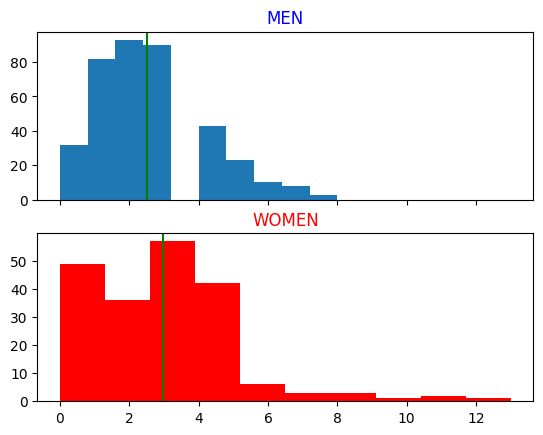

In [103]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].hist(data=men_filtered, x="total_score",bins=10)
ax[0].set_title('MEN',color="b")
ax[0].axvline(x =men_filtered["total_score"].mean() , color = 'g', label = 'mean')
ax[1].hist(data=women_filtered, x="total_score",bins=10, color="r")
ax[1].set_title('WOMEN', color="r")
ax[1].axvline(x =women_filtered["total_score"].mean() , color = 'g', label = 'mean')
plt.show()


As we can see, the distributions are highly right skewed. Therefore, we cannot asume normality of the data. Therefore, we will have to use a non-parametric hypothesis test.

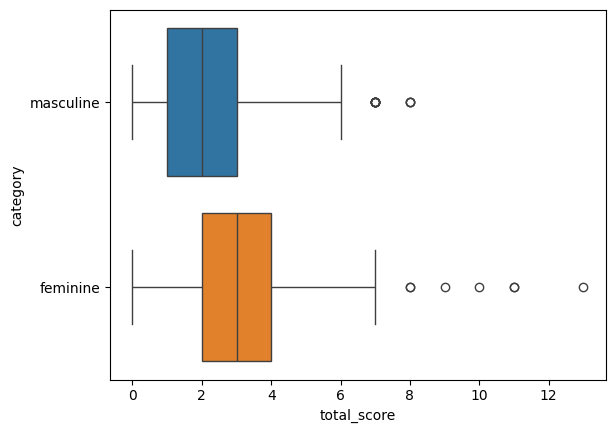

In [104]:
men_filtered['category'] = 'masculine'
women_filtered["category"] = 'feminine'
both = pd.concat((men_filtered, women_filtered))
sns.boxplot(x="total_score",y="category", hue="category",data=both)
plt.show()

In [105]:
#Hypothesis test
#Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
#since the data are not normal, we cannot use unpaired t-test. Therefore, Wilcoxon-Mann-Whitney will be the adequate test to use. 
#since the alternative hypothesis is that women score more than men, we will use a one-tail test.
p_val=stats.mannwhitneyu(women_filtered["total_score"], men_filtered["total_score"], alternative="greater").pvalue

alpha = 0.01 #as required

if p_val < alpha:
    result = "reject"
else:
    result  = "fail to reject"
# Store the result in a dictionary
result_dict = {"p_val": p_val, "result": result}

# Print or use the result_dict as needed
print(result_dict )    

{'p_val': 0.005106609825443641, 'result': 'reject'}


**Since the nil hypothesis was rejected, we can conclude that women matches have a greater total score on average.  **